<a href="https://colab.research.google.com/github/lucca-miorelli/ufrgs_reatores_heterogeneos/blob/main/C%C3%A1lculo_de_Reatores_Qu%C3%ADmicos_Heterog%C3%AAneos_Desativa%C3%A7%C3%A3o_de_Catalisadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cálculo de Reatores Químicos Heterogêneos

<center><img alt="oil_industry" width="55%" src="https://raw.githubusercontent.com/lucca-miorelli/ufrgs_reatores_heterogeneos/main/dimitry-anikin-ATyawSn-NsE-unsplash%20(1).jpg"></center>

Photo by <a href="https://unsplash.com/@anikinearthwalker?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Dimitry Anikin</a> on <a href="https://unsplash.com/s/photos/chemical?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

  

## Fundamentos de Catálise
Um **catalisador** é uma substância que afeta a **taxa da reação química** através da mudança de mecanismo, sem perder sua identidade química.
Catalisadores **não**:
* mudam a entalpia da reação;
* alteram a composição final do equilíbrio química;
* fazem com que espécies que não tenham afinidade química interajam entre si.

Catálises podem ser divididas em duas categorias:
* **Homogênea**: processos nos quais o catalisador está em solução com pelo menos um dos reagentes.
* **Heterogênea**: quando envolve mais de uma fase; ocorre na interface com o sólido.

Catalisadores podem ser **porosos, monolíticos ou suportados**.

### Desativação de Catalisadores
A desativação de catalisadores ocorre naturalmente pela redução da disponibilidade de sítios ativos com o tempo. A atividade do catalisador $a(t)$ passa a integrar a equação da taxa da reação química $-r_a'$.

Por definição, a atividade do catalisador é a taxa da reação química no momento $t$ dividida pela taxa em $t=0$. Como:

 $$
 a(t) = \frac{-r_a'(t)}{-r_a'(t=0)}
 $$

 A desativação pode ocorrer de 3 formas: por **sinterização (aging)**, por **deposição de coque(coking ou fouling)** ou por **envenenamento**.


---
---

# Exemplo
<center><img alt="ex_1" width="65%" src="https://raw.githubusercontent.com/lucca-miorelli/ufrgs_reatores_heterogeneos/main/desativacao_catalisadores_ex1.png"></center>

Reação reversível entre dois gases A<==>R em reator de leito fixo.
* $F_{a_o} = 5 kmol\cdot h^{-1}$
* $T = 730 K$
* $P = 3 atm$
* $W = 1000 kg$

$-r_a' = 0,2 \cdot C_a^2 \cdot a(t)$
 
 Obter gráfixo $x_a(t)$:

 $x_a = f(t) = ?$


---
---
Do Balanço Molar:


* $-\frac{\partial F_a}{\partial W} = (-r_a ')$ $[1]$
* $ F_a = F_{a_o} (1-x_a) $ $[2]$

Da cinética:
* $ -r_a' = 0,2 \cdot C_a^2 \cdot a(t) $ **$[3]$**

Logo,

*  $ F_{a_o} \frac{\partial F_a}{\partial W} = 0,2 . C_{a_o}^2 \cdot (1-x_a)^2 \cdot a(t) $ 

Separando variáveis e integrando de 0 a $x_a$ e de 0 a $W$, considerando que desativação é infinitamente mais lento que tempo de residência da mistura reacional no reator.

* $γ = \frac{0,2 \cdot Ca_o^2}{Fa_o} = 100$

$$  x_a = 1 - \frac{1}{γ \cdot a(t) + 1} $$

Com a função acima, precisamos calcular a taxa de desativação para cada item **a, b, c e d**, e então obtemos $x_a(t)$.

O gráfico comparando a desativação de cada item está no final do notebook.

In [ ]:
# importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# definindo variável Gamma dada no exercício
gamma = 100

# definindo vetor tempo
T = np.array([i for i in range(121)])
T = T.astype(float)

---



---


#### a) $ - \frac{∂a}{∂t} = 8.3 \cdot 10^{-3} \cdot t$

In [ ]:
# definindo variáveis utilizadas na integração
t = sp.Symbol("t")
a = sp.Symbol("a")

# calculando integrais necessárias
print("Integral da esquerda: {}".format(sp.integrate( -1, (a, 1, a))))
print("Integral da direita: {}".format(sp.integrate( 1, (t, 0, t))))
print("a(t) = 1 - 8.3 * 10 ^ -3 * T")

Integral da esquerda: 1 - a
Integral da direita: t
a(t) = 1 - 8.3 * 10 ^ -3 * T


$$
a(t) = 1- 8.3 \cdot 10^{-3} \cdot t
$$

In [ ]:
# função que retorna a conversão no tempo
def XA_A(T):
  at_a = 1 - T * 8.3 * 10 ** -3
  xa_a = 1 - (gamma * at_a + 1) ** -1
  return xa_a

# obter conversão no tempo
xa_a = XA_A(T)



---



---



---


#### a) $ - \frac{∂a}{∂t} = 10^{3} \cdot (C_A + C_R) \cdot a$

In [ ]:
# calculando integrais necessárias
print("Integral da esquerda: {}".format(sp.integrate( - a ** -1, (a, 1, a))))
print("Integral da direita: {}".format(sp.integrate( 1, (t, 0, t))))
print("a(t) = exp ( - 50 * 10 ** -3 * t)")

Integral da esquerda: -log(a)
Integral da direita: t
a(t) = exp ( - 50 * 10 ** -3 * t)


$$
a(t) = \exp{(-50 \cdot 10^{-3} \cdot t)}
$$

In [ ]:
# função que retorna a conversão no tempo
def XA_B(T):
  at_b = np.exp(T * 50 * -1 * 10 ** -3)
  xa_b = 1 - (gamma * at_b + 1) ** -1
  return xa_b

# obter conversão no tempo
xa_b = XA_B(T)



---



---



#### c) $ - \frac{∂a}{∂t} = 3.3 \cdot a^2$

In [ ]:
# calculando integrais necessárias
print("Integral da esquerda: {}".format(sp.integrate( - a ** -2, (a, 1, a))))
print("Integral da direita: {}".format(sp.integrate( 1, (t, 0, t))))
print("a(t) =  1 / (3.3 * T + 1)")

Integral da esquerda: -1 + 1/a
Integral da direita: t
a(t) =  1 / (3.3 * T + 1)


$$
a(t) = \frac{1}{3.3 \cdot t + 1}
$$

In [ ]:
# função que retorna a conversão no tempo
def XA_C(T):
  at_c = (3.3 * T + 1) ** -1
  xa_c = 1 - (gamma * at_c + 1) ** -1
  return xa_c

# obter conversão no tempo
xa_c = XA_C(T)


---



---



#### d) $ - \frac{∂a}{∂t} = 666.5 \cdot a^3$

In [ ]:
# calculando integrais necessárias
print("Integral da esquerda:{}".format(sp.integrate(- a ** -3, (a, 1, a))))
print("Integral da direita: {}".format(sp.integrate(1, (t, 0, t))))
print("a(t) = sqrt([1333.t + 1]^-1)")

Integral da esquerda:-1/2 + 1/(2*a**2)
Integral da direita: t
a(t) = sqrt([1333.t + 1]^-1)


$$
a(t) = \sqrt{\frac{1}{1333 \cdot t + 1}}
$$

In [ ]:
# função que retorna a conversão no tempo
def XA_D(T):
  at_d = np.sqrt((1333.0 * T + 1) ** -1)
  xa_d = 1 - (gamma * at_d + 1) ** -1
  return xa_d

# obter conversão no tempo
xa_d = XA_D(T)




---



---

# Resultados:

Text(0, 0.5, 'Conversão')

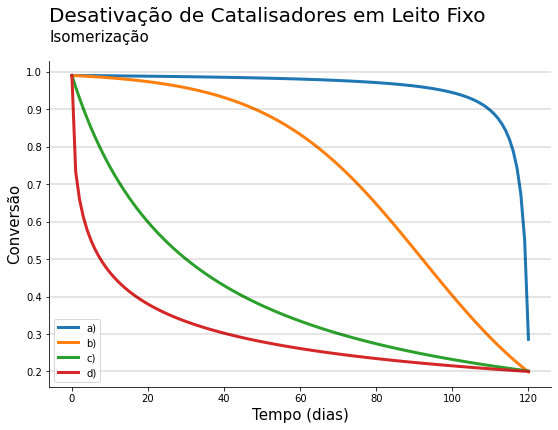

In [ ]:
# Plotar resultados

# Criar figura e axes para plotar conversão no tempo
fig, ax = plt.subplots(figsize=(9,6))

# plotar todas as conversões no tempo
for x in [xa_a, xa_b, xa_c, xa_d]:
  ax.plot(T, x, lw=3)

for y in np.arange(0.2, 1.1, 0.1).tolist():
  plt.axhline(y, lw=0.2, color='black')

# customizar gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['a)', 'b)', 'c)', 'd)'], loc='lower left')
#text
ax.text(0, 1.12,'Desativação de Catalisadores em Leito Fixo',
        transform=ax.transAxes, fontsize=20)
ax.text(0, 1.06,'Isomerização', transform=ax.transAxes, fontsize='15')
ax.set_xlabel('Tempo (dias)', fontsize=15)
ax.set_ylabel('Conversão', fontsize=15)

<img alt="lucca_assinatura" width="60%" src="https://raw.githubusercontent.com/lucca-miorelli/ds_projects/main/lucca_github.png">

[Github](https://github.com/lucca-miorelli/ds_projects) | [Linkedin](https://www.linkedin.com/in/lucca-miorelli/)